# Kernel tests

with skimage and opencv

## creating random 0 and 1 matrix

### imports

In [2]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt

import skimage.io
import skimage.filters
%matplotlib widget

### Matrix

In [29]:
random_matrix = [0] * 9500 + [1] * 500

random.shuffle(random_matrix)
np_matrix = np.array(random_matrix)

shaped_matrix = np_matrix.reshape(100, 100,1)

In [30]:
random_matrix2 = [0] * 9500 + [2] * 500

random.shuffle(random_matrix2)
np_matrix2 = np.array(random_matrix2)

shaped_matrix2 = np_matrix2.reshape(100, 100,1)

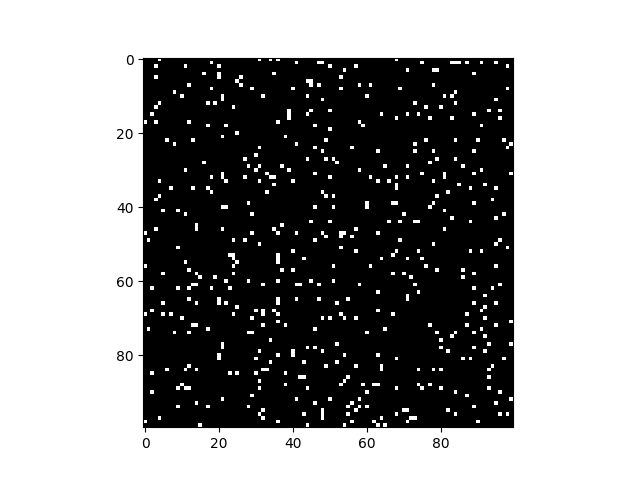

In [31]:
plt.figure()
plt.imshow(shaped_matrix2, cmap='gray')

## creating a meshgrid

https://bic-berkeley.github.io/psych-214-fall-2016/numpy_meshgrid.html

https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

numpy.meshgrid(*xi, copy=True, sparse=False, indexing='xy')[source]
Return coordinate matrices from coordinate vectors.

Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate arrays x1, x2,…, xn.

In [32]:
x_coord = [*range(0,100)]
y_coord = [*range(0,100)]

In [33]:
import numpy as np
x_coords, y_coords = np.meshgrid(range(100), range(100), indexing='ij')
x_coords

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [97, 97, 97, ..., 97, 97, 97],
       [98, 98, 98, ..., 98, 98, 98],
       [99, 99, 99, ..., 99, 99, 99]])

In [34]:
coordinate_grid = np.array([x_coords, y_coords])
coordinate_grid.shape

(2, 100, 100)

In [35]:
coordinate_grid

array([[[ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [97, 97, 97, ..., 97, 97, 97],
        [98, 98, 98, ..., 98, 98, 98],
        [99, 99, 99, ..., 99, 99, 99]],

       [[ 0,  1,  2, ..., 97, 98, 99],
        [ 0,  1,  2, ..., 97, 98, 99],
        [ 0,  1,  2, ..., 97, 98, 99],
        ...,
        [ 0,  1,  2, ..., 97, 98, 99],
        [ 0,  1,  2, ..., 97, 98, 99],
        [ 0,  1,  2, ..., 97, 98, 99]]])

In [38]:
added_matrix = coordinate_grid.reshape(2,100,100,1) + shaped_matrix

TypeError: Invalid shape (2, 100, 100, 1) for image data

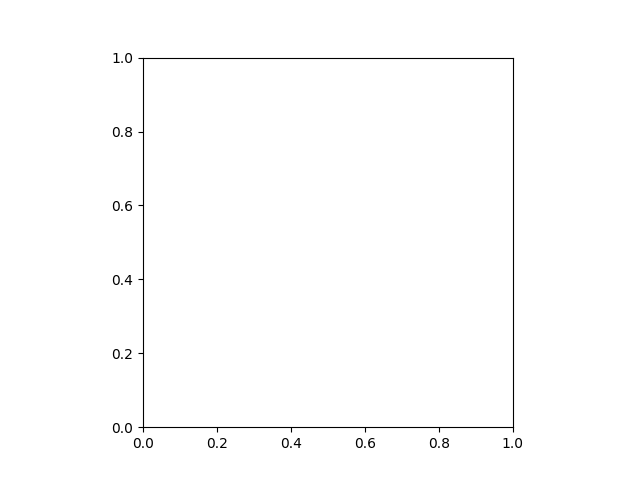

In [40]:
plt.figure()
plt.imshow(added_matrix, cmap='gray')

## testing with dataframe grid

In [26]:
# Break grid in rows. First as if feature is in row

df_grid = pd.read_csv('../livablestreets/data/WorkingTables/Berlin_grid_100m.csv')

lat_start_limits = df_grid['lat_start'].unique()
lng_start_limits = df_grid['lng_end'].unique()

# for lats_index in range(5,7):#range(len(lat_start_limits)):
#     df_grid = df_grid[df_grid['lat']>=lat_start_limits[lats_index]]
#     df_grid = df_grid[df_grid['lat']<lat_end_limits[lats_index]]
    
# print(df_grid)

In [27]:
len(lat_start_limits)

374

In [28]:
len(lng_start_limits)

359

In [29]:
df_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134266 entries, 0 to 134265
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   lat_start            134266 non-null  float64
 1   lat_end              134266 non-null  float64
 2   lng_start            134266 non-null  float64
 3   lng_end              134266 non-null  float64
 4   lat_center           134266 non-null  float64
 5   lng_center           134266 non-null  float64
 6   km_to_centroid       134266 non-null  float64
 7   grid_in_berlin       134266 non-null  bool   
 8   degrees_to_centroid  134266 non-null  float64
dtypes: bool(1), float64(8)
memory usage: 8.3 MB


In [30]:
len(lat_start_limits)*len(lng_start_limits)

134266

In [31]:
df_grid

,lat_start,lat_end,lng_start,lng_end,lat_center,lng_center,km_to_centroid,grid_in_berlin,degrees_to_centroid
0,52.673946,52.674846,13.088348,13.090219,52.674396,13.089283,28.580351,False,151.086018
1,52.673946,52.674846,13.090219,13.092089,52.674396,13.091154,28.486979,False,150.940452
2,52.673946,52.674846,13.092089,13.093960,52.674396,13.093024,28.393863,False,150.793543
3,52.673946,52.674846,13.093960,13.095830,52.674396,13.094895,28.301005,False,150.645274
4,52.673946,52.674846,13.095830,13.097701,52.674396,13.096765,28.208406,False,150.495627
...,...,...,...,...,...,...,...,...,...
134261,52.338246,52.339146,13.750511,13.752381,52.338696,13.751446,29.803319,False,335.000641
134262,52.338246,52.339146,13.752381,13.754252,52.338696,13.753317,29.904185,False,335.117700
134263,52.338246,52.339146,13.754252,13.756122,52.338696,13.755187,30.005250,False,335.233737
134264,52.338246,52.339146,13.756122,13.757993,52.338696,13.757058,30.106509,False,335.348764


In [32]:
matrix_1Dgrid = df_grid.to_numpy()
n_columns = len(df_grid.columns)

In [33]:
n_columns

9

In [34]:
matrix_2Dgrid = matrix_1Dgrid.reshape(len(lat_start_limits),len(lng_start_limits),n_columns)

In [35]:
matrix_2Dgrid.shape

(374, 359, 9)

## testing with featurecounts csv

In [36]:
df_berlin = pd.read_csv('../livablestreets/data/WorkingTables/FeatCounts_Berlin_grid_3000m.csv')
df_berlin.shape

(132, 22)

In [37]:
df_berlin[500:510]

,lat_start,lat_end,lng_start,lng_end,lat_center,lng_center,km_to_centroid,grid_in_berlin,degrees_to_centroid,polygon,...,activities_health_care,activities_public_service,comfort_leisure_sports,comfort_sports,convenience,mobility_public_transport,social_community,social_culture,social_eating,social_night_life


In [38]:
df_berlin.nunique()

lat_start                     12
lat_end                       12
lng_start                     11
lng_end                       11
lat_center                    12
lng_center                    11
km_to_centroid               132
grid_in_berlin                 2
degrees_to_centroid          132
polygon                      132
activities_economic           24
activities_education          29
activities_health_care        39
activities_public_service     38
comfort_leisure_sports        28
comfort_sports                20
convenience                   18
mobility_public_transport     43
social_community              17
social_culture                23
social_eating                 37
social_night_life             27
dtype: int64

## Function grid to matrix, dropping coordinates

In [39]:

def grid_tomatrix(df):
    lat_start_limits = df['lat_start'].unique()
    lng_start_limits = df['lng_end'].unique()
    df_num = df.iloc[:,10:]
    matrix_1Dgrid = df_num.to_numpy()
    n_columns = len(df_num.columns)

    matrix_2Dgrid = matrix_1Dgrid.reshape(len(lat_start_limits),len(lng_start_limits),n_columns)
    return matrix_2Dgrid

In [40]:
grid_berlin = grid_tomatrix(df_berlin)

In [41]:
grid_berlin.shape

(12, 11, 12)

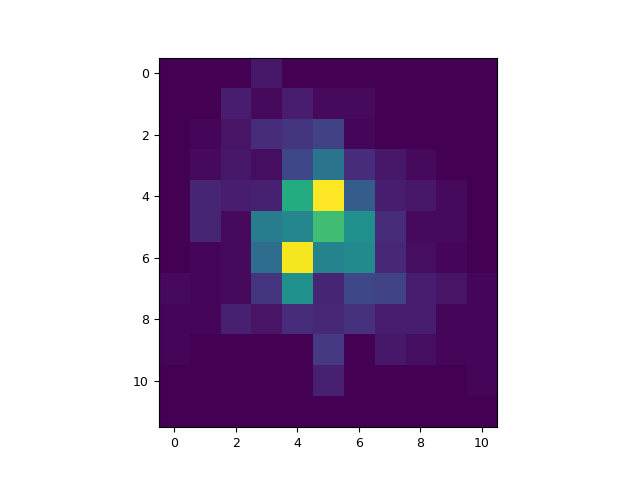

In [42]:
plt.figure()
plt.imshow(grid_berlin[:,:,1])

## Function blurring image

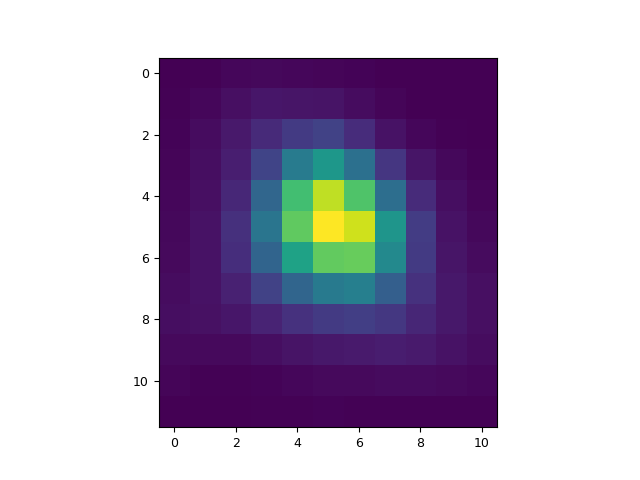

In [43]:
sigma = 1
truncate = sigma*2

blurred_pad = skimage.filters.gaussian(
    grid_berlin[:,:,6], sigma=(sigma, sigma), truncate= truncate, mode='wrap')

plt.figure()
plt.imshow(blurred_pad)

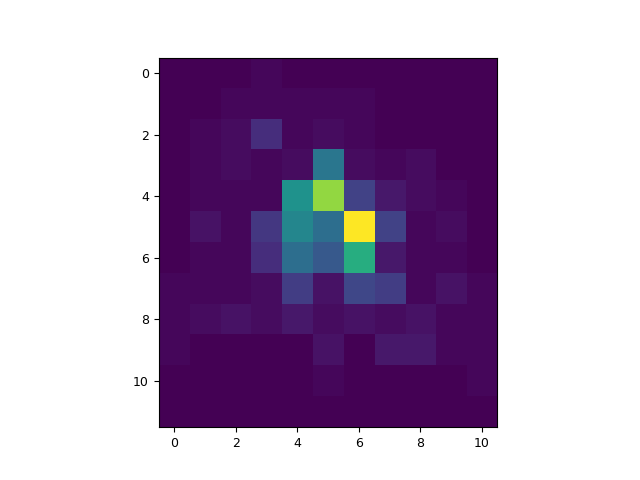

In [44]:
def blur_matrix(array,sigmapx):
    truncate = sigmapx*3
    blurred_img = skimage.filters.gaussian(
        array, sigma=(sigmapx, sigmapx), truncate= truncate, mode='wrap')
    
    return blurred_img.reshape(array.shape[0],array.shape[1],1)

plt.figure()
plt.imshow(blur_matrix(grid_berlin[:,:,6],0))

In [45]:
blur_matrix(grid_berlin[:,:,1],0).shape

(12, 11, 1)

## Function Standarization

In [46]:
from sklearn.preprocessing import MinMaxScaler

def minmax_blur(array,sigmapx):
    
    blured = blur_matrix(array,sigmapx)
    x, y = array.shape
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled =scaler.fit_transform(blured.reshape(x*y,1)).reshape(x,y,1)
    
    return scaled

In [47]:
minmax_blur(grid_berlin[:,:,1],2).max()

1.0

In [48]:
minmax_blur(grid_berlin[:,:,1],2).shape

(12, 11, 1)

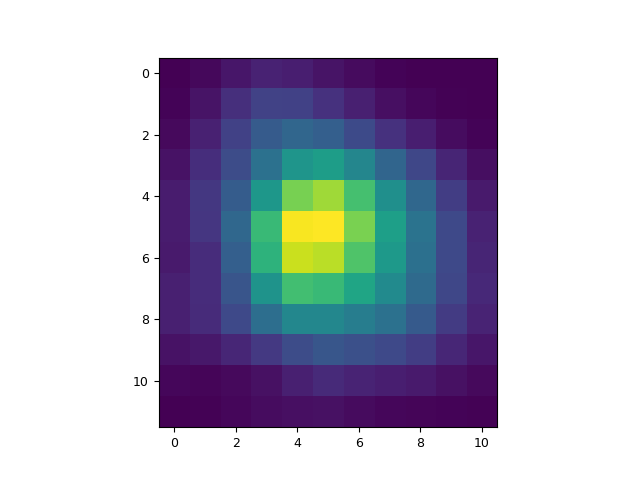

In [49]:
plt.figure()
plt.imshow(minmax_blur(grid_berlin[:,:,3],1))

## Function for loop channels

In [50]:
ls = [*range(grid_berlin.shape[2])]
ls

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [51]:
grid_berlin.shape

(12, 11, 12)

In [52]:
ls = list(range(2,5))
ls

[2, 3, 4]

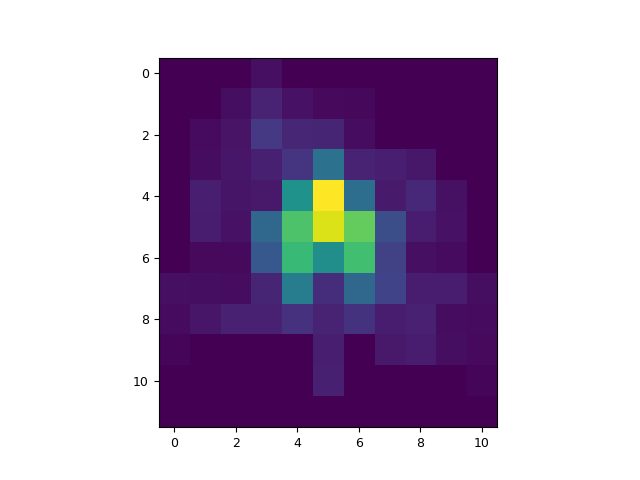

In [53]:
def loop_channels(array,slice_start,slice_stop,sigmapx):
#     array_sc = minmax_blur(array,sigmapx)
    blurred_img = np.zeros((array.shape[0],array.shape[1],1))
                              
    for i in list( range( slice_start, slice_stop )):
        blur_channel = minmax_blur(array[:,:,i],sigmapx)
        blurred_img += blur_channel
    return blurred_img

plt.figure()
plt.imshow(loop_channels(grid_berlin,0,12,0))

In [54]:
img = loop_channels(grid_berlin,1,12,1)

In [55]:
from sklearn.preprocessing import MinMaxScaler

def minmax_all(array):

    x, y, z = array.shape
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled =scaler.fit_transform(array.reshape(x*y,z)).reshape(x,y,z)
    
    return scaled

In [56]:
minmax_all(img).max()

1.0

# Final

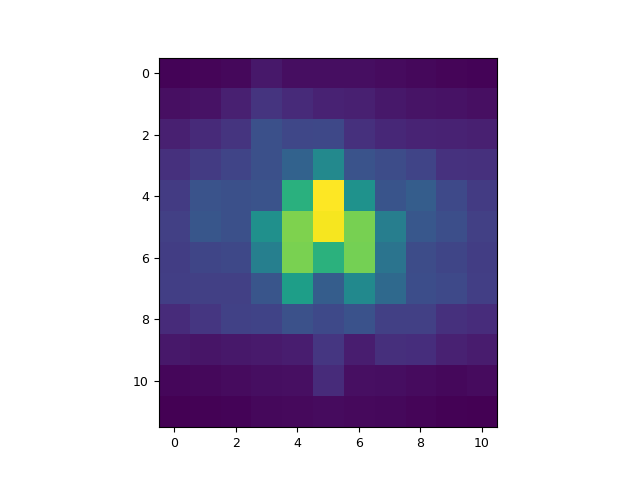

In [57]:
from sklearn.preprocessing import MinMaxScaler
from skimage.filters import gaussian

def grid_tomatrix(df):
    #set the limits of the df for getting the shape
    lat_start_limits = df['lat_start'].unique()
    lng_start_limits = df['lng_end'].unique()

    #discard lat long columns, only sparse matrix remains
    df_num = df.iloc[:,10:]
    matrix_1Dgrid = df_num.to_numpy()
    n_columns = len(df_num.columns)

    matrix_2Dgrid = matrix_1Dgrid.reshape(len(lat_start_limits),len(lng_start_limits),n_columns)

    return matrix_2Dgrid



def blur_matrix(array,sigmapx):

    truncate = sigmapx*3
    blurred_img = gaussian(
        array, sigma=(sigmapx, sigmapx), truncate= truncate, mode='wrap')

    return blurred_img.reshape(array.shape[0],array.shape[1],1)



def minmax_array(array):

    x, y, z = array.shape

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled =scaler.fit_transform(array.reshape(x*y,z)).reshape(x,y,z)

    return scaled


sigma_list = [1,2,1,1,3,4,2,1,2,4,2,1]
sigma_list = [0,0,0,0,0,0,8,0,0,9,0,0]


def loop_channels(array,slice_start,slice_stop,sigma_list):
    assert len(sigma_list) == array.shape[2], 'sigma list and array has different length'

    blurred_img = np.zeros((array.shape[0],array.shape[1],1))

    for i in list( range( slice_start, slice_stop )):
        blur_channel = minmax_array(blur_matrix(array[:,:,i],sigma_list[i]))
        blurred_img += blur_channel
    return blurred_img


plt.figure()
plt.imshow(loop_channels(grid_berlin,1,12,sigma_list))

# test with kernel and convolution

## shadow test

In [58]:
from matplotlib.pyplot import imread

import matplotlib.pyplot as plt

def compute_convolution(img, kernel):
    # Parameters
    kernel = np.array(kernel)
    kernel_height, kernel_width = kernel.shape

    img = np.squeeze(img) # Removes dimensions of size 1
    img_height, img_width = img.shape
    
    array = []

    for x in range(img_height - kernel_height + 1):
        arr = []
        
        for y in range(img_width - kernel_width + 1):
            
            a = np.multiply(img[x: x + kernel_height, y: y + kernel_width], kernel)
            arr.append(a.sum())
            
        array.append(arr)
        
    return array

In [59]:
identity_kernel = [
    [80,90,100, 90, 80],
    [50,70, 80, 70, 50],
    [0, 40, 50, 40, 0],
    [0, 30, 40, 30, 0],
    [0,  0, 20,  0, 0]
]

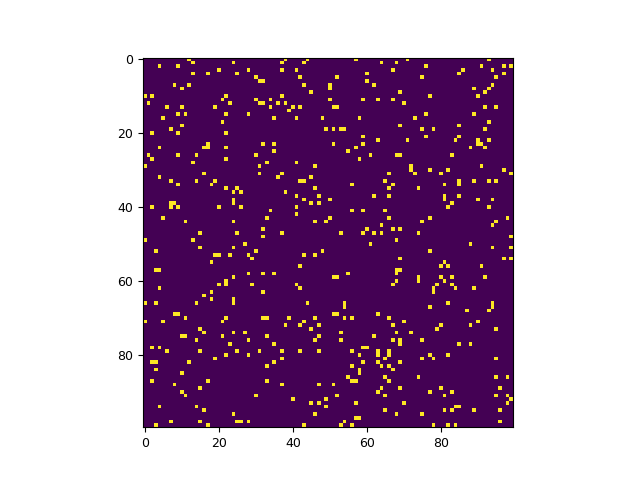

In [60]:
plt.figure()

plt.imshow(shaped_matrix)

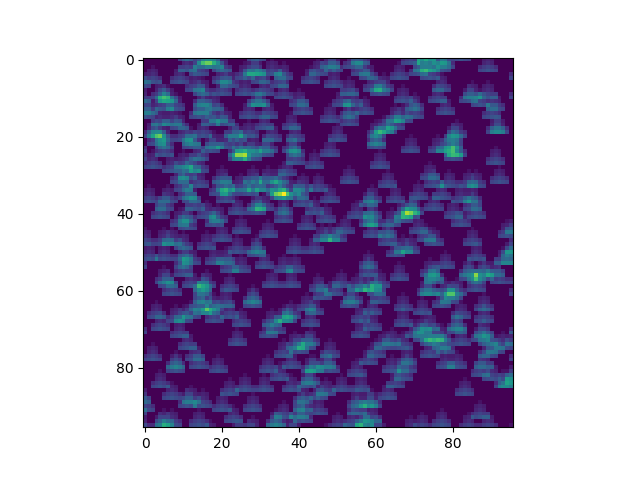

In [64]:
idimg = compute_convolution(shaped_matrix,identity_kernel)

plt.figure()

plt.imshow(idimg)

In [65]:
def plot_convolution(img, kernel, activation=False):
    ''' The following printing function ease the visualization'''
    
    img = np.squeeze(img)
    output_img = compute_convolution(img, kernel)
    if activation:
        output_img = np.maximum(output_img, 0)
    
    plt.figure(figsize=(8, 3))
    
    ax1 = plt.subplot2grid((3,3),(0,0), rowspan=3)
    ax1.imshow(img, cmap='gray')
    ax1.title.set_text('Input image')
    
    ax2 = plt.subplot2grid((3,3),(1, 1))
    ax2.imshow(kernel, cmap='gray')
    ax2.title.set_text('Kernel')    
    
    ax3 = plt.subplot2grid((3,3),(0, 2), rowspan=3)
    ax3.imshow(output_img, cmap='gray')
    ax3.title.set_text('Output image')    

    
    for ax in [ax1, ax2, ax3]:
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        
    plt.show()

In [66]:
kernel_1 = [
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
]

identity_kernel2 = [
    [100,100,100, 100, 100],
    [50,70, 80, 70, 50],
    [0, 40, 50, 40, 0],
    [0, 30, 40, 30, 0],
    [0,  0, 20,  0, 0]
]

identity_kernel3 = [
    [0, 0, 100, 0, 0],
    [0,70, 80, 70, 0],
    [30, 40, 50, 40, 30],
    [20, 30, 40, 30, 20],
    [10,  20, 20,  20, 10]
]

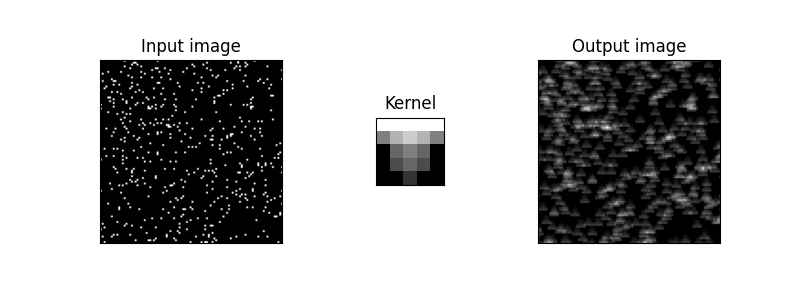

In [67]:
plot_convolution(shaped_matrix, identity_kernel2)

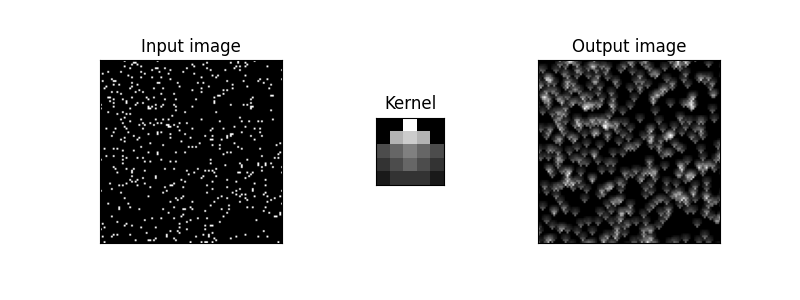

In [61]:
plot_convolution(shaped_matrix, identity_kernel3, activation=True)

In [69]:
random_matrix_h = [0]*5000 + [1]*2000 + [2]*1000 + [3]*1000 + [4]*500 + [5]*300 + [10]*200

random.shuffle(random_matrix_h)
np_matrix = np.array(random_matrix_h)

shaped_matrix_h = np_matrix.reshape(100,100)

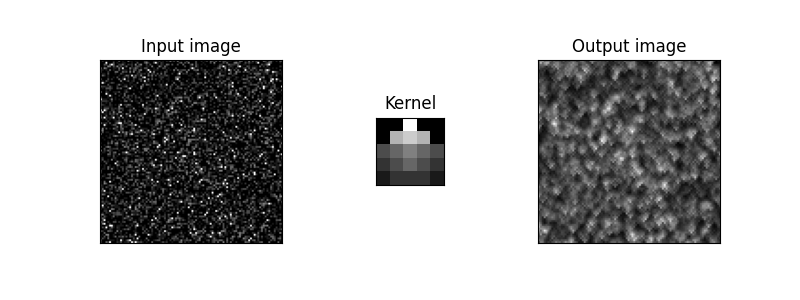

In [70]:
plot_convolution(shaped_matrix_h, identity_kernel3, activation=True)